In [1]:
import openai
import os
import sys
import datetime as dt

os.getcwd()

'/var'

In [2]:
lib_path = "/var/genie-in-the-box/src/lib"

if lib_path not in sys.path:
    sys.path.append( lib_path )

sys.path

['/Applications/PyCharm.app/Contents/plugins/python/helpers-pro/jupyter_debug',
 '/Applications/PyCharm.app/Contents/plugins/python/helpers/pydev',
 '/var',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/var/genie-in-the-box/src/lib']

In [3]:
! ls -alh /var/genie-in-the-box/src/lib

total 28K
drwxr-xr-x  3 1000 1000 4.0K Jul  6 16:50 .
drwxr-xr-x 11 1000 1000 4.0K Jul  6 13:48 ..
-rw-r--r--  1 1000 1000    0 Jun 13 16:35 __init__.py
drwxr-xr-x  2 1000 1000 4.0K Jul  6 16:50 __pycache__
-rw-rw-r--  1 1000 1000 9.0K Jul  6 16:50 util.py
-rw-rw-r--  1 1000 1000 2.7K Jun 19 17:08 util_stopwatch.py


In [4]:
import util_stopwatch as sw

ModuleNotFoundError: No module named 'lib'

In [3]:
os.chdir( "/var/genie-in-the-box/src/prompts" )
os.getcwd()

'/var/genie-in-the-box/src/prompts'

In [5]:
!ls -alh data

total 196K
drwxr-xr-x 4 1000 1000 4.0K Jul  5 19:31 .
drwxr-xr-x 4 1000 1000 4.0K Jul  5 15:09 ..
-rw-r--r-- 1 1000 1000 6.1K Jun 20 18:53 .DS_Store
-rw-r--r-- 1 1000 1000 4.0K Jun 20 18:53 ._.DS_Store
-rw-r--r-- 1 1000 1000    0 Jun 13 16:35 __init__.py
drwxr-xr-x 2 1000 1000 4.0K Jun 20 18:42 fine-tuning-results
drwxr-xr-x 2 1000 1000 4.0K Jun 20 18:53 jsonl
-rw-r--r-- 1 1000 1000 1.5K Jul  5 19:22 munger.py
-rw-r--r-- 1 1000 1000  804 Jun 22 18:17 synthetic-data-generation-synonymous-load-url-in-current-tab-v2.json
-rw-r--r-- 1 1000 1000  21K Jun 19 18:26 synthetic-data-load-url-current-tab.json
-rw-r--r-- 1 1000 1000    0 Jul  5 15:21 synthetic-data-load-url-current-tab.txt
-rw-r--r-- 1 1000 1000  20K Jun 19 18:39 synthetic-data-load-url-new-tab.json
-rw-r--r-- 1 1000 1000 7.3K Jul  4 16:55 synthetic-data-load-url-new-tab.txt
-rw-r--r-- 1 1000 1000 5.6K Jun  9 19:57 synthetic-data-search-google-in-current-tab.json
-rw-r--r-- 1 1000 1000 8.5K Jul  5 17:58 synthetic-data-search-googl

In [44]:
! openai tools fine_tunes.prepare_data -f  data/jsonl/open-new-or-current-tab.jsonl -q

Analyzing...

- Your file contains 199 prompt-completion pairs
- Based on your data it seems like you're trying to fine-tune a model for classification
- For classification, we recommend you try one of the faster and cheaper models, such as `ada`
- For classification, you can estimate the expected model performance by keeping a held out dataset, which is not used for training
- There are 8 duplicated prompt-completion sets. These are rows: [22, 24, 26, 27, 31, 34, 35, 36]
- All prompts end with suffix `\n\n###\n\n`

Based on the analysis we will perform the following actions:
- [Recommended] Remove 8 duplicate rows [Y/n]: Y
- [Recommended] Would you like to split into training and validation set? [Y/n]: Y


Your data will be written to a new JSONL file. Proceed [Y/n]: Y

Wrote modified files to `data/jsonl/open-new-or-current-tab_prepared_train (1).jsonl` and `data/jsonl/open-new-or-current-tab_prepared_valid (1).jsonl`
Feel free to take a look!

Now use that file when fine-tuning:
> o

In [25]:
!openai api fine_tunes.create -t "data/jsonl/open-new-or-current-tab_prepared_train.jsonl" -v "data/jsonl/open-new-or-current-tab_prepared_valid.jsonl" --compute_classification_metrics --classification_positive_class " 1" -m ada


Upload progress: 100%|████████████████████| 12.7k/12.7k [00:00<00:00, 28.2Mit/s]
Uploaded file from data/jsonl/open-new-or-current-tab_prepared_train.jsonl: file-dzgwYPUv484LlBjlpYoOIK8R
Upload progress: 100%|████████████████████| 3.31k/3.31k [00:00<00:00, 7.62Mit/s]
Uploaded file from data/jsonl/open-new-or-current-tab_prepared_valid.jsonl: file-Iu2dHX0ukEk8EJ5bN6PzhnSK
Created fine-tune: ft-h9Q4Tpsa5I2e9SK9U1bKiCKF
Streaming events until fine-tuning is complete...

(Ctrl-C will interrupt the stream, but not cancel the fine-tune)
[2023-06-20 17:28:02] Created fine-tune: ft-h9Q4Tpsa5I2e9SK9U1bKiCKF

Stream interrupted (client disconnected).
To resume the stream, run:

  openai api fine_tunes.follow -i ft-h9Q4Tpsa5I2e9SK9U1bKiCKF



In [30]:
!openai api fine_tunes.follow -i ft-h9Q4Tpsa5I2e9SK9U1bKiCKF


[2023-06-20 17:28:02] Created fine-tune: ft-h9Q4Tpsa5I2e9SK9U1bKiCKF
[2023-06-20 17:29:57] Fine-tune costs $0.00
[2023-06-20 17:29:57] Fine-tune enqueued. Queue number: 6
[2023-06-20 17:35:15] Fine-tune is in the queue. Queue number: 5
[2023-06-20 17:36:40] Fine-tune is in the queue. Queue number: 4
[2023-06-20 17:37:13] Fine-tune is in the queue. Queue number: 3
[2023-06-20 17:43:49] Fine-tune is in the queue. Queue number: 2
[2023-06-20 17:46:33] Fine-tune is in the queue. Queue number: 1
[2023-06-20 17:47:07] Fine-tune is in the queue. Queue number: 0
[2023-06-20 17:47:17] Fine-tune started
[2023-06-20 17:47:55] Completed epoch 1/4
[2023-06-20 17:48:20] Completed epoch 2/4
[2023-06-20 17:48:44] Completed epoch 3/4
[2023-06-20 17:49:08] Completed epoch 4/4
[2023-06-20 17:49:29] Uploaded model: ada:ft-deepily-2023-06-20-17-49-29
[2023-06-20 17:49:30] Uploaded result file: file-6bmJhQ6zF7kYNq62CdYKpHEi
[2023-06-20 17:49:30] Fine-tune succeeded

Job complete! Status: succeeded 🎉
Try out

In [9]:
! openai api completions.create -m ada:ft-deepily-2023-06-20-17-49-29 -p "New tab. Take me to NPR.com, please."

New tab. Take me to NPR.com, please.

###

 0.1

 1. Please Unite
 0


In [34]:
!openai api fine_tunes.results -i ft-h9Q4Tpsa5I2e9SK9U1bKiCKF > data/fine-tuning-results/ft-deepily-2023-06-20-17-49-29.csv

In [39]:
import pandas as pd

In [40]:
results = pd.read_csv( "data/fine-tuning-results/ft-deepily-2023-06-20-17-49-29.csv" )
results[results["classification/accuracy"].notnull()].tail(1)

,step,elapsed_tokens,elapsed_examples,training_loss,training_sequence_accuracy,training_token_accuracy,validation_loss,validation_sequence_accuracy,validation_token_accuracy,classification/accuracy,classification/precision,classification/recall,classification/auroc,classification/auprc,classification/f1.0
608,609,12537,609,0.002378,1.0,1.0,0.004028,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


<AxesSubplot:>

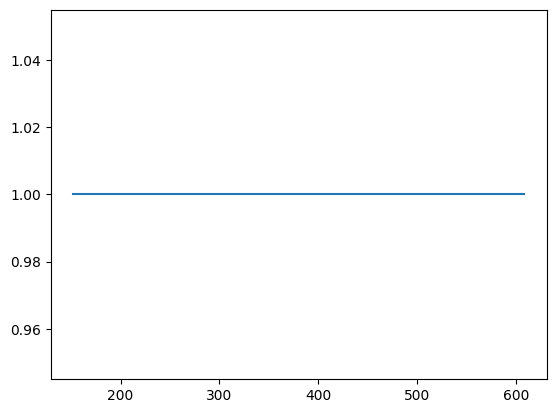

In [41]:
results[results["classification/accuracy"].notnull()]["classification/accuracy"].plot()

In [37]:
! ls -alh data/fine-tuning-results

total 44K
drwxr-xr-x 2 1000 1000 4.0K Jun 20 18:42 .
drwxr-xr-x 4 1000 1000 4.0K Jun 20 18:41 ..
-rw-r--r-- 1 root root  33K Jun 20 18:42 ft-deepily-2023-06-20-17-49-29.csv


In [58]:
timer = sw.Stopwatch()

NameError: name 'sw' is not defined

In [7]:
class_dictionary = dict()
class_dictionary[ "0" ] = "open-current-tab"
class_dictionary[ "1" ] = "open-new-tab"

In [10]:
ft_model = "ada:ft-deepily-2023-06-20-17-49-29"

openai.api_key = os.getenv( "FALSE_POSITIVE_API_KEY" )
# vox_command = "New tab. Take me to NPR.com, please."
# vox_command = "Load CNN.com in this tab"
# vox_command = "Open foo.com here"
vox_command = "Open a new tab and open foo.com"
start_millis = dt.datetime.now()

# ! openai api completions.create -m ada:ft-deepily-2023-06-20-17-49-29 -p "New tab. Take me to NPR.com, please."
response = openai.completions.create(
    model=ft_model,
    prompt=vox_command + "\n\n###\n\n",
    max_tokens=1,
    temperature=0,
    logprobs=2
)
print( response[ "choices" ][ 0 ][ "logprobs" ][ "top_logprobs" ][ 0 ], end="\n\n" )
first  = float( response[ "choices" ][ 0 ][ "logprobs" ][ "top_logprobs" ][ 0 ][ " 0" ] )
second = float( response[ "choices" ][ 0 ][ "logprobs" ][ "top_logprobs" ][ 0 ][ " 1" ] )
print( "1st class: {:.9f}".format( first ) )
print( "2nd class: {:.9f}".format( second ), end="\n\n" )

class_idx = response[ "choices" ][ 0 ][ "text" ].strip()
print( type( class_idx ) )
print( class_dictionary[ class_idx ] )
print( vox_command )

delta = dt.datetime.now() - start_millis
millis = int( delta.total_seconds() * 1000 )
msg = "Done"
print( "{0} in {1:,} ms".format( msg, millis ) )


{
  " 1": -4.2433903e-06,
  "1": -13.074348
}



KeyError: ' 0'

In [23]:
import numpy as np

In [54]:
foo = {
  " 1": -4.2433903e-06,
  "1": -13.074348
}

bar = foo.items()
# Print items in list
for item in bar:
    # format as full precision float
    print( "{:.2f}%".format( np.exp( float( item[ 1 ] ) ) * 100 ) )

100.00%
0.00%


In [59]:
# Create a function to convert a dictionary of log odds into an array of probabilities.
def log_odds_to_probabilities( log_odds, class_dictionary ):

    # Convert dictionary to a list of tuples
    log_odds = log_odds.items()
    probabilities = [ ]

    for item in log_odds:

        class_name = class_dictionary[ item[ 0 ].strip() ]
        print( "{}: {:.4f}%".format( class_name, np.exp( float( item[ 1 ] ) ) * 100 ) )
        probabilities.append( ( class_name, np.exp( item[ 1 ] ) * 100 ) )

    return probabilities[ 0 ]

best_guess = log_odds_to_probabilities( foo, class_dictionary )
best_guess

open-new-tab: 99.9996%
open-new-tab: 0.0002%


('open-new-tab', 99.99957566187032)

In [58]:

import json
import ast

In [98]:
def get_best_guess( command_str, ft_model, class_dictionary ):

    start_millis = dt.datetime.now()

    response = openai.completions.create(
        model=ft_model,
        prompt=command_str + "\n\n###\n\n",
        max_tokens=1,
        temperature=0,
        logprobs=2
    )

    # print( response[ "choices" ][ 0 ][ "logprobs" ][ "top_logprobs" ][ 0 ], end="\n\n" )

    # class_idx = response[ "choices" ][ 0 ][ "text" ].strip()
    # print( type( class_idx ) )
    # print( class_dictionary[ class_idx ] )
    # print( command_str )

    delta = dt.datetime.now() - start_millis
    millis = int( delta.total_seconds() * 1000 )
    print( "Call to [{}] done in {:,} ms".format( ft_model, millis ) )

    # convert open AI object into a native Python dictionary... ugly!
    bar = ast.literal_eval( str( response[ "choices" ][ 0 ][ "logprobs" ][ "top_logprobs" ][ 0 ] ) )

    return log_odds_to_probabilities( bar, class_dictionary )


openai.api_key = os.getenv( "FALSE_POSITIVE_API_KEY" )
# vox_command = "New tab. Take me to NPR.com, please."
# vox_command = "Load CNN.com in this tab"
# vox_command = "Open foo.com here"
vox_command = "Open a new tab and go to foo.com"
ft_model    = "ada:ft-deepily-2023-06-20-17-49-29"

best_guess = get_best_guess( vox_command, ft_model, class_dictionary )
best_guess


Call to [ada:ft-deepily-2023-06-20-17-49-29] done in 126 ms
open-new-tab: 99.9995%
open-new-tab: 0.0002%


('open-new-tab', 99.99948020155097)